In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso # Lasso 모델 생성
from sklearn.model_selection import train_test_split # train, test set 생성
from sklearn.metrics import mean_squared_error

In [2]:
# 1. data set loading
half = pd.read_csv("C:/Users/jjh99/바탕 화면/capstone_data/real_data_no_log.csv", encoding = 'CP949')
# half.info()

# 상권 코드 (첫 번째 열) 제거한 use 데이터셋 생성 
use = half.iloc[:, 1:]
use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   총_매출_금액                 1301 non-null   float64
 1   아파트_단지_수                1301 non-null   float64
 2   아파트_면적_66_제곱미터_미만_세대_수  1301 non-null   float64
 3   아파트_면적_66_제곱미터_세대_수     1301 non-null   float64
 4   아파트_면적_99_제곱미터_세대_수     1301 non-null   float64
 5   아파트_면적_132_제곱미터_세대_수    1301 non-null   float64
 6   아파트_면적_165_제곱미터_세대_수    1301 non-null   float64
 7   아파트_가격_1_억_미만_세대_수      1301 non-null   float64
 8   아파트_가격_1_억_세대_수         1301 non-null   float64
 9   아파트_가격_2_억_세대_수         1301 non-null   float64
 10  아파트_가격_3_억_세대_수         1301 non-null   float64
 11  아파트_가격_4_억_세대_수         1301 non-null   float64
 12  아파트_가격_5_억_세대_수         1301 non-null   float64
 13  아파트_가격_6_억_이상_세대_수      1301 non-null   float64
 14  아파트_평균_면적               1301 non-null   

In [3]:
cols = list(use.columns)
cols

['총_매출_금액',
 '아파트_단지_수',
 '아파트_면적_66_제곱미터_미만_세대_수',
 '아파트_면적_66_제곱미터_세대_수',
 '아파트_면적_99_제곱미터_세대_수',
 '아파트_면적_132_제곱미터_세대_수',
 '아파트_면적_165_제곱미터_세대_수',
 '아파트_가격_1_억_미만_세대_수',
 '아파트_가격_1_억_세대_수',
 '아파트_가격_2_억_세대_수',
 '아파트_가격_3_억_세대_수',
 '아파트_가격_4_억_세대_수',
 '아파트_가격_5_억_세대_수',
 '아파트_가격_6_억_이상_세대_수',
 '아파트_평균_면적',
 '아파트_평균_시가',
 '총_유동인구_수',
 '남성_유동인구_수',
 '여성_유동인구_수',
 '연령대_10_유동인구_수',
 '연령대_20_유동인구_수',
 '연령대_30_유동인구_수',
 '연령대_40_유동인구_수',
 '연령대_50_유동인구_수',
 '연령대_60_이상_유동인구_수',
 '시간대_1_유동인구_수',
 '시간대_2_유동인구_수',
 '시간대_3_유동인구_수',
 '시간대_4_유동인구_수',
 '시간대_5_유동인구_수',
 '시간대_6_유동인구_수',
 '월요일_유동인구_수',
 '화요일_유동인구_수',
 '수요일_유동인구_수',
 '목요일_유동인구_수',
 '금요일_유동인구_수',
 '토요일_유동인구_수',
 '일요일_유동인구_수',
 '총.상주인구.수',
 '남성.상주인구.수',
 '여성.상주인구.수',
 '연령대.10.상주인구.수',
 '연령대.20.상주인구.수',
 '연령대.30.상주인구.수',
 '연령대.40.상주인구.수',
 '연령대.50.상주인구.수',
 '연령대.60.이상.상주인구.수',
 '총.가구.수',
 '아파트.가구.수',
 '비.아파트.가구.수',
 '총_직장_인구_수',
 '남성_직장_인구_수',
 '여성_직장_인구_수',
 '연령대_10_직장_인구_수',
 '연령대_20_직장_인구_수',
 '연령대_30_직장_인구_수',
 '연령대_40_직장_인구_수',
 '연령대_

In [4]:
x_cols = cols[1:]
y_cols = cols[0]
x_cols # 78개의 column
y_cols # 총_매출_금액

'총_매출_금액'

In [5]:
# train set과 test set split(7:3)
use_train, use_test = train_test_split(use, test_size = 0.3)

In [6]:
use_train.shape # (910, 79)
use_test.shape # (391, 79)

(391, 79)

In [7]:
lasso_model = Lasso().fit(use_train[x_cols], use_train[y_cols]) # 생성자 -> 객체 생성
#lasso_model.fit(X = use_train[x_cols], y = use_train[y_cols]) 

C:\Users\jjh99\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.789436822455502e+22, tolerance: 2.6988031427693584e+19
  model = cd_fast.enet_coordinate_descent(


In [8]:
lasso_model.coef_ # 기울기

array([ 2.79670233e+15,  8.70317758e+14, -1.89154448e+15, -5.66303422e+15,
        3.73777093e+15,  0.00000000e+00, -8.13273052e+14, -2.74798720e+15,
       -0.00000000e+00,  2.98474310e+15,  3.74541557e+15, -0.00000000e+00,
        1.63558746e+15, -0.00000000e+00,  1.98112207e+09,  1.11564445e+13,
       -1.85998718e+13,  3.29652074e+13,  1.33795209e+14, -8.41793547e+13,
        2.48304396e+14, -3.23554442e+14,  2.91814909e+14, -8.68960086e+13,
        2.12032905e+14, -5.77514680e+14,  2.19055531e+13,  3.70769477e+14,
       -2.30555295e+14,  4.72796102e+13, -4.44126274e+14,  1.90022657e+14,
        3.01007793e+14,  1.01856755e+14, -1.16339681e+14,  4.85604045e+14,
       -4.35347337e+14,  0.00000000e+00, -5.32420743e+15,  3.08380628e+15,
       -2.88907732e+15,  3.44105337e+15, -6.16083669e+15,  3.81121653e+14,
        1.52801993e+16, -1.93685421e+16,  6.81753901e+15,  6.72777042e+15,
        0.00000000e+00,  8.49824292e+13, -5.59745186e+14,  2.33239948e+15,
       -2.42659337e+16, -

In [9]:
lasso_model.intercept_ 
# 회귀방정식 = X * 기울기 + 절편
# 실행할 때마다 값이 바뀌므로 이 값 자체는 유의미하지는 않음

854298288.4955502

In [10]:
y_pred = lasso_model.predict(X=use_test[x_cols])
y_pred
len(y_pred) # 391

391

In [11]:
y_true = use_test[y_cols]
y_true

917     8.349005e+09
1099    8.341199e+09
66      3.453430e+09
720     6.810149e+09
586     4.402227e+09
            ...     
666     2.092770e+09
623     1.152907e+10
867     6.278062e+08
116     4.687752e+09
507     6.380378e+09
Name: 총_매출_금액, Length: 391, dtype: float64

In [12]:
# 실제값(y_true)과 예측값(y_pred) 리스트 출력
sample = pd.DataFrame(
{
    'y_pred' : y_pred,
    'y_true' : y_true
})
sample

,y_pred,y_true
917,9.950257e+09,8.349005e+09
1099,8.190992e+09,8.341199e+09
66,2.476841e+09,3.453430e+09
720,8.681275e+09,6.810149e+09
586,9.925895e+09,4.402227e+09
...,...,...
666,6.299911e+09,2.092770e+09
623,7.031187e+09,1.152907e+10
867,5.245313e+09,6.278062e+08
116,7.785977e+09,4.687752e+09


In [13]:
# 상대 오차 구하기 
# 실제값과 예측값의 차를 실제값으로 나눠 오차의 정도를 파악할 수 있음
relative_error = (sample['y_true'] - sample['y_pred']) / sample['y_true']
relative_error.head()
sample['relative_error'] = relative_error
sample.head()

,y_pred,y_true,relative_error
917,9.950257e+09,8.349005e+09,-0.191790
1099,8.190992e+09,8.341199e+09,0.018008
66,2.476841e+09,3.453430e+09,0.282788
720,8.681275e+09,6.810149e+09,-0.274756
586,9.925895e+09,4.402227e+09,-1.254744


In [14]:
# 예측값과 실제값, 상대 오차로 이루어진 list csv 파일 생성
sample.to_csv("C:\\Users\\jjh99\\바탕 화면\\capstone_data\\relative_error_lasso_no_log.csv", encoding = 'utf-8-sig')

In [16]:
# 라쏘 모델의 점수
print("train set score: {:.3f}".format(lasso_model.score(use_train[x_cols], use_train[y_cols])))
print("test set score: {:.3f}".format(lasso_model.score(use_test[x_cols], use_test[y_cols])))
print("The number of feature = {}".format(np.sum(lasso_model.coef_ != 0)))
print("max_iter : {}".format(lasso_model.n_iter_))

# train set score: 0.873
# test set score: 0.854
# The number of feature = 53
# max_iter : 1000

train set score: 0.873
test set score: 0.854
The number of feature = 53
max_iter : 1000


In [20]:
lasso_model_1 = Lasso(alpha = 0.1, max_iter = 100000).fit(use_train[x_cols], use_train[y_cols])
print("Train set score = {}".format(lasso_model_1.score(use_train[x_cols], use_train[y_cols])))
print("Test set score = {}".format(lasso_model_1.score(use_test[x_cols], use_test[y_cols])))
print("The number of feature = {}".format(np.sum(lasso_model_1.coef_ != 0)))
print("Max_iter = {}".format(lasso_model_1.n_iter_))

Train set score = 0.8861038491931732
Test set score = 0.8367329357611989
The number of feature = 59
Max_iter = 100000


C:\Users\jjh99\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5886603860829404e+22, tolerance: 2.6988031427693584e+19
  model = cd_fast.enet_coordinate_descent(


In [18]:
lasso_model_100 = Lasso(alpha = 0.001, max_iter = 100000).fit(use_train[x_cols], use_train[y_cols])
print("Train set score = {}".format(lasso_model_100.score(use_train[x_cols], use_train[y_cols])))
print("Test set score = {}".format(lasso_model_100.score(use_test[x_cols], use_test[y_cols])))
print("The number of feature = {}".format(np.sum(lasso_model_100.coef_ != 0)))
print("Max_iter = {}".format(lasso_model_100.n_iter_))

Train set score = 0.8931857644492821
Test set score = 0.8134600262045207
The number of feature = 74
Max_iter = 100000


C:\Users\jjh99\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4463190900726859e+22, tolerance: 2.6988031427693584e+19
  model = cd_fast.enet_coordinate_descent(


In [19]:
lasso_model_1000 = Lasso(alpha = 0.0001, max_iter = 100000).fit(use_train[x_cols], use_train[y_cols])
print("Train set score = {}".format(lasso_model_1000.score(use_train[x_cols], use_train[y_cols])))
print("Test set score = {}".format(lasso_model_1000.score(use_test[x_cols], use_test[y_cols])))
print("The number of feature = {}".format(np.sum(lasso_model_1000.coef_ != 0)))
print("Used Max_iter = {}".format(lasso_model_1000.n_iter_))

Train set score = 0.8932045515993718
Test set score = 0.8133977926399686
The number of feature = 75
Used Max_iter = 100000


C:\Users\jjh99\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4416406828044715e+22, tolerance: 2.6988031427693584e+19
  model = cd_fast.enet_coordinate_descent(


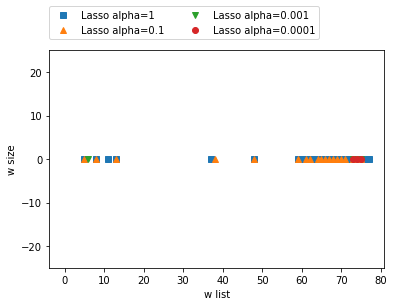

In [22]:
import matplotlib.pyplot as plt

plt.plot(lasso_model.coef_, 's', label="Lasso alpha=1")

plt.plot(lasso_model_1.coef_, '^', label="Lasso alpha=0.1")

plt.plot(lasso_model_100.coef_, 'v', label="Lasso alpha=0.001")

plt.plot(lasso_model_1000.coef_, 'o', label="Lasso alpha=0.0001")

plt.legend(ncol=2, loc=(0, 1.05))

plt.xlabel("w list")

plt.ylabel("w size")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-25, 25)
plt.show()